# Brain Tumor Segmentation Project

### Download Dataset

In [1]:
!wget https://figshare.com/ndownloader/articles/1512427/versions/5

--2024-03-25 17:44:45--  https://figshare.com/ndownloader/articles/1512427/versions/5
Resolving figshare.com (figshare.com)... 54.73.41.93, 99.80.161.159, 2a05:d018:1f4:d000:9109:86b1:c1a0:5109, ...
Connecting to figshare.com (figshare.com)|54.73.41.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 879501695 (839M) [application/zip]
Saving to: ‘5’

5                   100%[===================>] 838.76M  29.8MB/s    in 30s     

2024-03-25 17:45:16 (28.3 MB/s) - ‘5’ saved [879501695/879501695]



### Connect to Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content

/content


### Clone Code from Github

In [4]:
!git clone https://github.com/itizazhub/segmentation.git

Cloning into 'segmentation'...
remote: Enumerating objects: 197, done.
remote: Counting objects: 100% (197/197), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 197 (delta 123), reused 137 (delta 63), pack-reused 0
Receiving objects: 100% (197/197), 18.67 MiB | 27.99 MiB/s, done.
Resolving deltas: 100% (123/123), done.


### Change Directory to Segmentation Folder

In [5]:
%cd /content/segmentation

/content/segmentation


### Extract Images from Downloaded Dataset File

In [6]:
!python process_dataset.py

Creating unzipped_dataset folder
	Extracting files of ../5
	Done with ../5
Creating mat_files folder
  0% 0/4 [00:00<?, ?it/s]	Extracting files of unzipped_dataset/brainTumorDataPublic_1533-2298.zip
	Done with unzipped_dataset/brainTumorDataPublic_1533-2298.zip
 25% 1/4 [00:01<00:03,  1.28s/it]	Extracting files of unzipped_dataset/brainTumorDataPublic_2299-3064.zip
	Done with unzipped_dataset/brainTumorDataPublic_2299-3064.zip
 50% 2/4 [00:02<00:02,  1.30s/it]	Extracting files of unzipped_dataset/brainTumorDataPublic_1-766.zip
	Done with unzipped_dataset/brainTumorDataPublic_1-766.zip
 75% 3/4 [00:03<00:01,  1.20s/it]	Extracting files of unzipped_dataset/brainTumorDataPublic_767-1532.zip
	Done with unzipped_dataset/brainTumorDataPublic_767-1532.zip
100% 4/4 [00:05<00:00,  1.31s/it]
Creating images folder
Creating masks folder
100% 3064/3064 [02:05<00:00, 24.43it/s]
Total of 1860 Images and Masks are converted from .mat files


### Train Segmentation UNet Model

In [ ]:
!python main.py

Best weights and optimizer parameters are loaded
Device:  cuda
Training data:  911
Test data:  19
----Training started----
Epoch: 0, Training Loss: 0.188, Validation dice score: 0.8212, learning_rate: 0.00064
---Best val weights and optimizer parameters are saved---------
---Best training weights and optimizer parameters are saved----
Epoch: 1, Training Loss: 0.1901, Validation dice score: 0.8213, learning_rate: 0.00064
---Best val weights and optimizer parameters are saved---------
Epoch: 2, Training Loss: 0.1989, Validation dice score: 0.8245, learning_rate: 0.00064
---Best val weights and optimizer parameters are saved---------
Epoch: 3, Training Loss: 0.1887, Validation dice score: 0.7849, learning_rate: 0.0005120000000000001
Epoch: 4, Training Loss: 0.1897, Validation dice score: 0.8189, learning_rate: 0.0005120000000000001
Epoch: 5, Training Loss: 0.1843, Validation dice score: 0.7865, learning_rate: 0.0005120000000000001
---Best training weights and optimizer parameters are save

### Plot Training Results

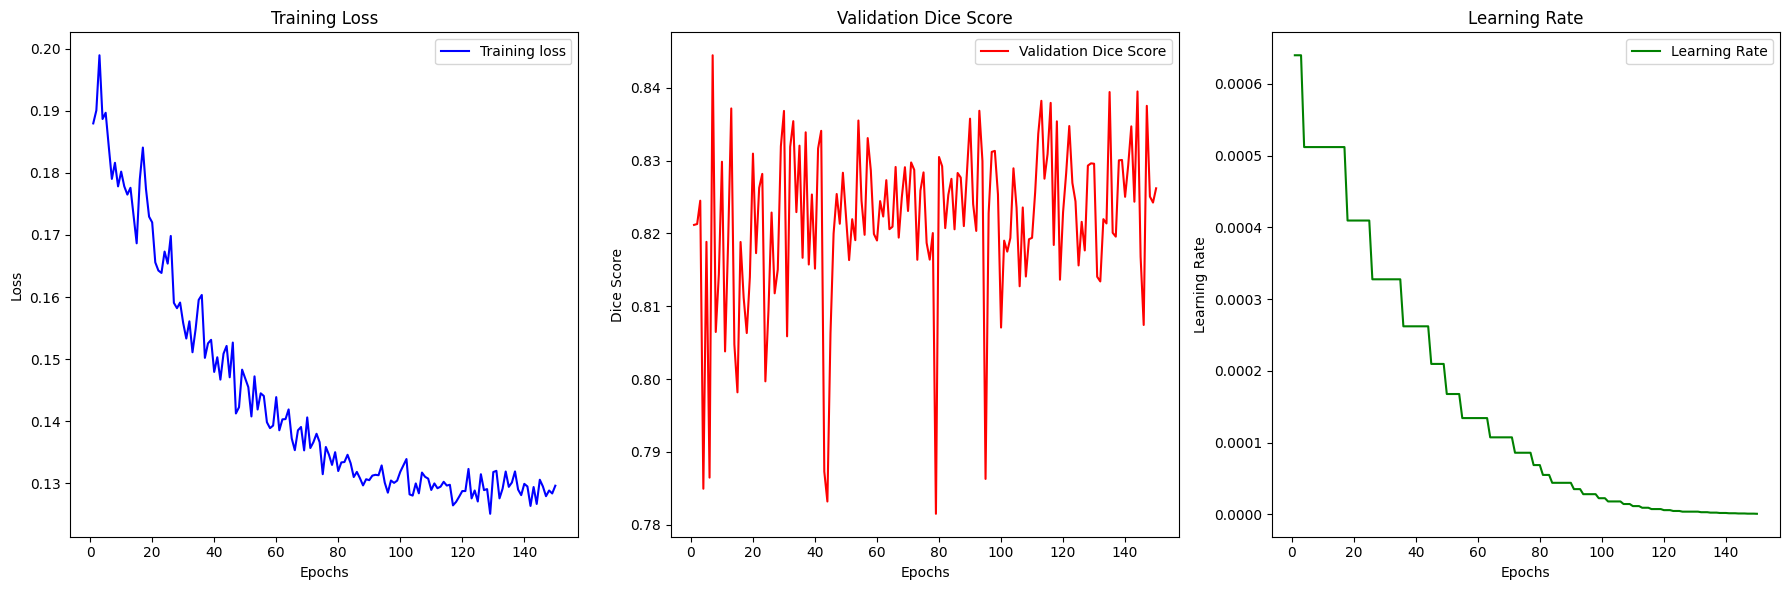

In [ ]:
from visualize_results import plot_loss
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plot_loss()

### Do Inference on All of Your Images in a Folder

In [ ]:
!python inference.py

### Feature Extraction Demo

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')


Area: 852.25
Perimeter: 108.3259
Radius: 16.4706
Diameter: 32.9411
Circularity: 0.9127
Eccentricity: 0.2832
texture_features: 7.3214


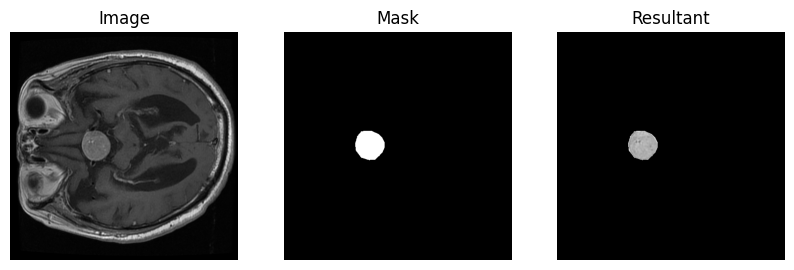

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from feature_extraction import extract_features
import warnings
warnings.filterwarnings('ignore')

image_path = "/content/segmentation/images/922.png"
mask_path = "/content/segmentation/masks/922.png"
mask = np.array(Image.open(mask_path).convert('L'))
image = np.array(Image.open(image_path).convert('L'))

# Perform point-to-point multiplication
result = mask * image

perimeter, area, radius, diameter, circularity, eccentricity, texture_features = extract_features(mask, result)

print("Perimeter:", perimeter)
print("Area:", area)
print("Radius:", radius)
print("Diameter:", diameter)
print("Circularity:", circularity) #1 circular 0 non-circular
print("Eccentricity:", eccentricity) #0 circular 1 non-circular
print("texture_features:", texture_features)

# Plot the original arrays and the result
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# Plot mask
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Image')
axs[0].axis('off')

# Plot image
axs[1].imshow(mask, cmap='gray')
axs[1].set_title('Mask')
axs[1].axis('off')

# Plot the result
axs[2].imshow(result, cmap='gray')
axs[2].set_title('Resultant')
axs[2].axis('off')

plt.show()

### Extract Features From Images and Masks

In [7]:
!python feature_extraction.py

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1

## Train SVM and Random Forest Classifiers

### Load Dataset

In [8]:
import pandas as pd
from config import config

features_dataset = pd.read_csv(config.result_folder_path.joinpath('features_dataset.csv'))
features_dataset.head()

,perimeter,area,radius,diameter,circularity,eccentricity,texture_features
0,70.8701,348.25,10.5286,21.0572,0.8713,0.6430,4.6125
1,42.5563,120.00,6.1804,12.3608,0.8326,0.7236,3.8557
2,88.4767,545.00,13.1711,26.3423,0.8749,0.5947,5.6426
3,91.1335,580.00,13.5875,27.1750,0.8776,0.4365,5.9275
4,87.5269,508.75,12.7256,25.4511,0.8345,0.5196,6.4027


### Analyze Diameter

<Axes: ylabel='Frequency'>

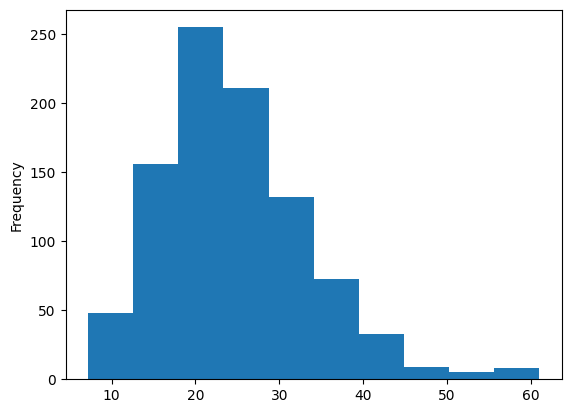

In [9]:
features_dataset['diameter'].plot(kind='hist')

### Add Class column in the Dataset by Applying Condition on Diameter column

1    868
2     54
0      8
Name: class, dtype: int64


<Axes: ylabel='Frequency'>

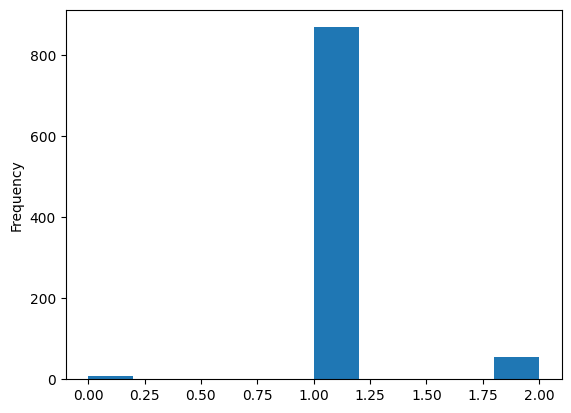

In [10]:
features_dataset['class'] = features_dataset['diameter'].apply(lambda x: 0 if x <= 10 else (1 if x < 40 else 2))
print(features_dataset['class'].value_counts())
features_dataset['class'].plot(kind='hist')

### Drop 500 Random Rows where class is 1

<Axes: ylabel='Frequency'>

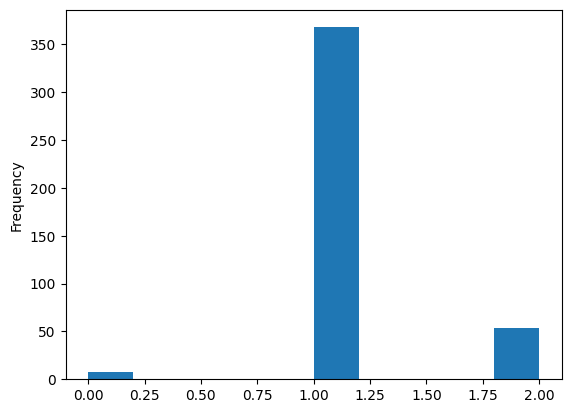

In [60]:
import pandas as pd
import numpy as np

df = features_dataset
class_1_indices = df.index[df['class'] == 1]
random_indices = np.random.choice(class_1_indices, 500, replace=False)
df = df.drop(random_indices)
df['class'].plot(kind='hist')

In [42]:
df.head()

,perimeter,area,radius,diameter,circularity,eccentricity,texture_features,class
6,80.2843,310.50,9.9416,19.8832,0.6054,0.8794,4.5824,1
7,84.7193,427.25,11.6618,23.3236,0.7480,0.7362,5.8491,1
8,123.6690,1086.25,18.5947,37.1895,0.8925,0.5679,9.8506,1
9,98.9828,590.00,13.7041,27.4082,0.7567,0.5361,7.2697,1
10,118.7107,708.25,15.0148,30.0295,0.6316,0.7661,7.5382,1


### Balance the Dataset by Random Sampling with Replacement

In [68]:
import pandas as pd
from sklearn.utils import resample

class_0 = df[df['class'] == 0]
class_1 = df[df['class'] == 1]
class_2 = df[df['class'] == 2]

max_samples = max(len(class_0), len(class_1), len(class_2))

class_0_upsampled = resample(class_0, replace=True, n_samples=max_samples // 2, random_state=42)
class_1_upsampled = resample(class_1, replace=True, n_samples=max_samples, random_state=42)
class_2_upsampled = resample(class_2, replace=True, n_samples=max_samples // 2, random_state=42)

balanced_df = pd.concat([class_0_upsampled, class_1_upsampled, class_2_upsampled])

balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

balanced_df.head()


,perimeter,area,radius,diameter,circularity,eccentricity,texture_features,class
0,211.9949,2405.00,27.6683,55.3366,0.6725,0.7914,11.3992,2
1,31.3137,68.50,4.6695,9.3390,0.8779,0.6568,8.4987,0
2,83.0122,488.50,12.4697,24.9395,0.8908,0.5719,7.2496,1
3,48.5563,166.25,7.2745,14.5491,0.8861,0.6952,3.0560,1
4,95.3553,657.75,14.4696,28.9391,0.9090,0.3365,6.2732,1


### Compare Values Before and After Resampling

In [69]:
print(features_dataset['class'].value_counts())
print(balanced_df['class'].value_counts())

1    868
2     54
0      8
Name: class, dtype: int64
1    368
2    184
0    184
Name: class, dtype: int64


### Analyze Diameter After Resampling

<Axes: ylabel='Frequency'>

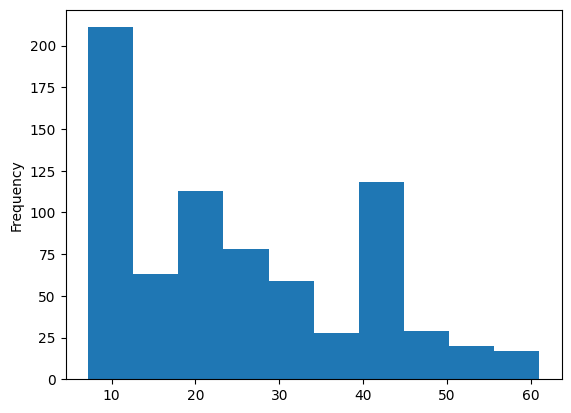

In [70]:
balanced_df['diameter'].plot(kind='hist')

### Split Dataset into Train(scaled) and Test sets

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X = balanced_df.iloc[:,:-1]
y = balanced_df.iloc[:,-1:]
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Train SVM

In [72]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_classifier = SVC(kernel='rbf', random_state=42)

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        40

    accuracy                           1.00       148
   macro avg       1.00      1.00      1.00       148
weighted avg       1.00      1.00      1.00       148



### Plot Confusion Matrix for SVM

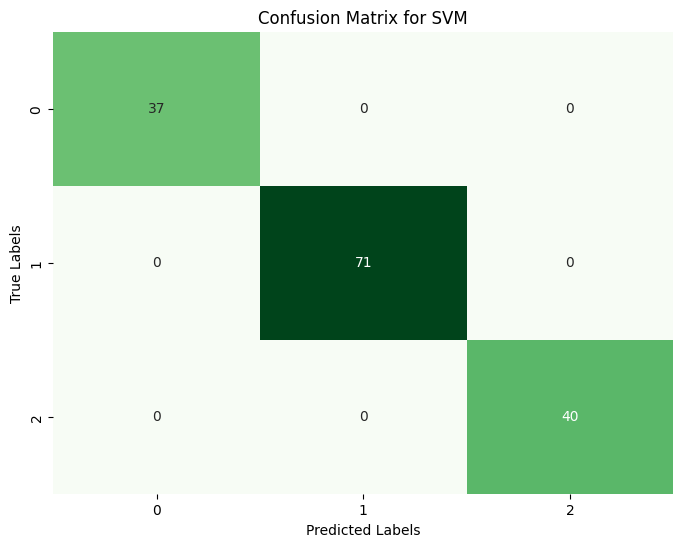

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix_svm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Train Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))


Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        40

    accuracy                           1.00       148
   macro avg       1.00      1.00      1.00       148
weighted avg       1.00      1.00      1.00       148



### Plot Confusion Matrix for Random Forest

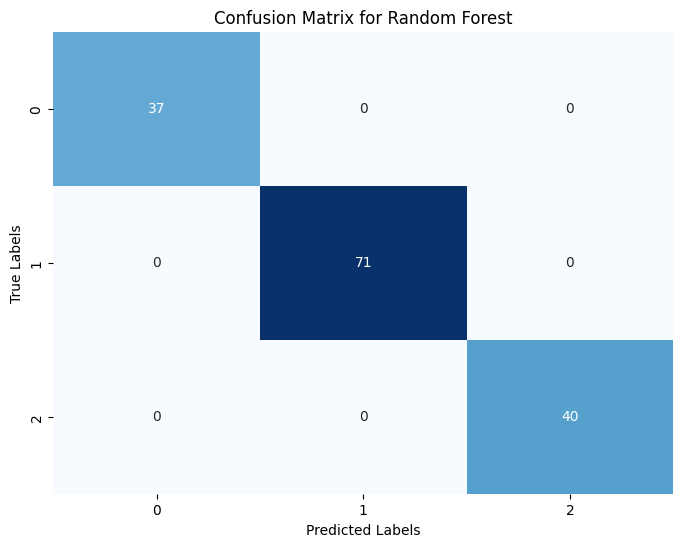

In [75]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Save Models

In [76]:
import joblib
joblib.dump(svm_classifier, config.result_folder_path.joinpath('svm_model.pkl'))
joblib.dump(rf_classifier, config.result_folder_path.joinpath('random_forest_model.pkl'))
joblib.dump(scaler, config.result_folder_path.joinpath('scaler.pkl'))

['/content/drive/MyDrive/segmentation_project/results/scaler.pkl']

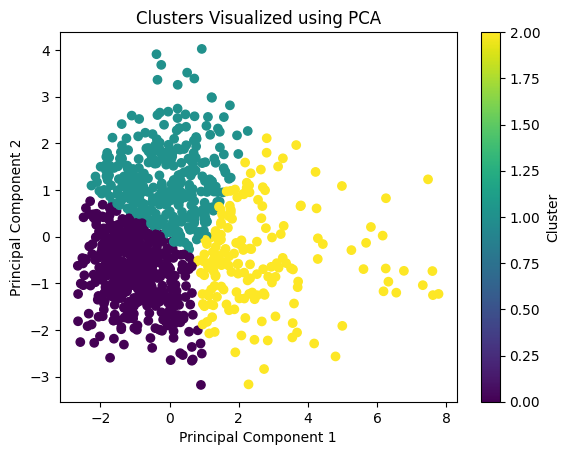

In [ ]:
# import numpy as np
# np.float = float
# import joblib
# from sklearn.cluster import KMeans
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# X = features_dataset
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# n_clusters = 3
# kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# kmeans.fit(X_scaled)

# clusters = kmeans.predict(X_scaled)
# features_dataset['cluster'] = clusters

# # Save the trained KMeans model and Scaler
# joblib.dump(kmeans, config.result_folder_path.joinpath('kmeans_model.pkl'))
# joblib.dump(scaler, config.result_folder_path.joinpath('scaler.pkl'))

# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
# plt.title('Clusters Visualized using PCA')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.colorbar(label='Cluster')
# plt.show()


In [ ]:
# features_dataset['cluster'].value_counts()

0    416
1    337
2    177
Name: cluster, dtype: int64

# Full Pipeline Segmentation + Classifier

### Load Models

In [77]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
import joblib
from sklearn.preprocessing import StandardScaler
from unet_model import UNet
from feature_extraction import extract_features
from pathlib import Path
from config import config
import os

transformation = transforms.Compose([
        transforms.Grayscale(),
        transforms.Resize((config.image_size, config.image_size))
    ])
device = "cuda" if torch.cuda.is_available() else "cpu"
model = UNet()
model.to(device)
checkpoint_path = config.training_weights_path.joinpath("best_128.pth")
if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))
    model.load_state_dict(checkpoint['model_state_dict'])
else:
    print("No Weights are Found")

scaler_loaded = joblib.load(config.result_folder_path.joinpath('scaler.pkl'))
svm_loaded = joblib.load(config.result_folder_path.joinpath('svm_model.pkl'))
random_forest_loaded = joblib.load(config.result_folder_path.joinpath('random_forest_model.pkl'))
classes = ['micro', 'macro', 'giant']

### Do Inference

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')


Perimeter: 107.9117
Area: 850.75
Radius: 16.4561
Diameter: 32.9121
Circularity: 0.9181
Eccentricity: 0.3725
texture_features: 2.4935


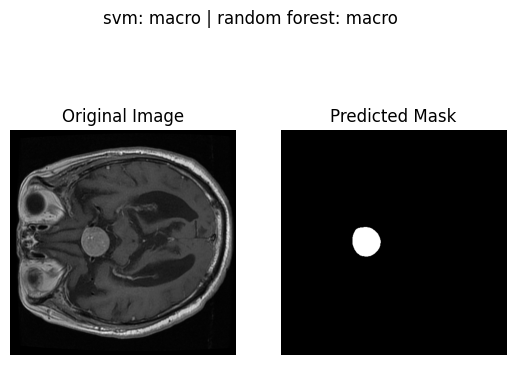

In [80]:
model.eval()
'''
micro 0 = 1557, 1413
macro 1 = 922
giant 2 = 1541
'''
path = "/content/segmentation/images/922.png"
with torch.no_grad():
    image = Image.open(path)
    image1 = transformation(image)
    image1 = TF.to_tensor(image1)
    image1 = image1.unsqueeze(dim=0)
    image1 = image1.to(device)
    model.to(device)
    pred_mask = model(image1)
    pred_mask = (pred_mask > 0.5)

    pred_mask = pred_mask.squeeze().detach().cpu()
    pred_mask = pred_mask.numpy()
    mask1 = Image.fromarray(pred_mask)

    # image_name = str(image_name).split('\\')[-1]
    # img = TF.to_pil_image(image)
    # img = img.convert('L')
    mask1 = np.array(mask1)
    image = np.array(image.convert('L'))
    mul = mask1 * image
    perimeter, area,	radius,	diameter,	circularity,	eccentricity,	texture_features = extract_features(mask1, mul)
    print("Perimeter:", perimeter)
    print("Area:", area)
    print("Radius:", radius)
    print("Diameter:", diameter)
    print("Circularity:", circularity) #1 circular 0 non-circular
    print("Eccentricity:", eccentricity) #0 circular 1 non-circular
    print("texture_features:", texture_features)

    data = scaler_loaded.transform([[perimeter,	area,	radius,	diameter,	circularity,	eccentricity,	texture_features]])
    svm_pred = svm_loaded.predict(data)
    random_forest_pred = random_forest_loaded.predict(data)

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Plotting predicted mask
    plt.subplot(1, 2, 2)
    plt.imshow(mask1, cmap='gray')  # Assuming pred_mask is single-channel
    plt.title('Predicted Mask')
    plt.axis('off')

    plt.suptitle(f'svm: {classes[svm_pred[0]]} | random forest: {classes[random_forest_pred[0]]}')
    plt.savefig(config.result_folder_path.joinpath('inference.png'))
    plt.show()

### End

In [ ]:
scaler.get_params(deep=True)

{'copy': True, 'with_mean': True, 'with_std': True}